## Predicting Review Scores for Android Apps

This workbook includes data cleaning to ensure features can be used for prediction such as removal of nulls and outliers. Data exploration is also in this workbook to help understand what drives certain features for android applications.  

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data
df1 = pd.read_csv('googleplaystore_user_reviews.csv')
df1.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape


(10358, 13)

In [5]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
App               10358 non-null object
Category          10358 non-null object
Rating            8893 non-null float64
Reviews           10358 non-null object
Size              10358 non-null object
Installs          10358 non-null object
Type              10357 non-null object
Price             10358 non-null object
Content Rating    10357 non-null object
Genres            10358 non-null object
Last Updated      10358 non-null object
Current Ver       10350 non-null object
Android Ver       10355 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As seen above, price, size, installs and reviews data types are currently non-null objects that can be changed into numeric data types:

In [6]:
#Clean Data

# remove $ sign from Price
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.strip()
df['Price'] = df['Price'].str.replace('Everyone', '', regex=False)
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

# remove M and K from size
df['Size'] = df['Size'].str.strip()
df['Size'] = df['Size'].str.replace('Varies with device', '', regex=False)
df['Size'] = df['Size'].str.replace('M', '', regex=False)
df['Size'] = df['Size'].str.replace('k', '', regex=False)
df['Size'] = pd.to_numeric(df['Size'], errors = 'coerce')

# remove + from installs

df['Installs'] = df['Installs'].str.strip()
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

df['Reviews'] = df['Reviews'].str.strip()
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
App               10358 non-null object
Category          10358 non-null object
Rating            8893 non-null float64
Reviews           10357 non-null float64
Size              8831 non-null float64
Installs          1791 non-null float64
Type              10357 non-null object
Price             10357 non-null float64
Content Rating    10357 non-null object
Genres            10358 non-null object
Last Updated      10358 non-null object
Current Ver       10350 non-null object
Android Ver       10355 non-null object
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [8]:
## Check the stats
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8893.000000,1.035700e+04,8831.000000,1791.000000,10357.000000
mean,4.189542,4.059046e+05,37.278859,139.322725,1.030800
std,0.545452,2.696778e+06,100.257817,175.107047,16.278625
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,4.000000,3.200000e+01,5.500000,10.000000,0.000000
50%,4.300000,1.680000e+03,14.000000,100.000000,0.000000
75%,4.500000,4.641600e+04,33.000000,100.000000,0.000000
max,19.000000,7.815831e+07,1020.000000,500.000000,400.000000


Further cleaning is required to remove null values to ensure a good sample for prediction is used.

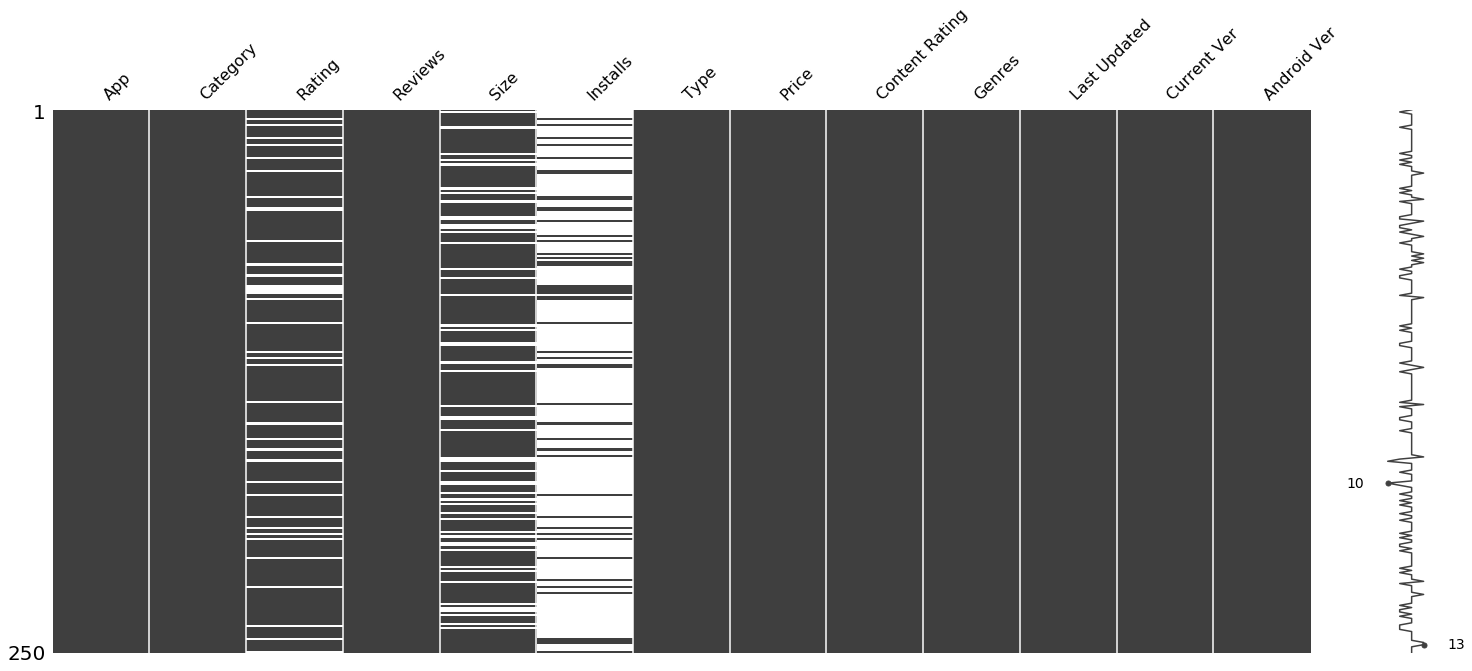

In [9]:
##Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [10]:
##Drop all nan's in the dataset at once

df.dropna(subset=['Size', 'Rating'], inplace=True)

df.shape

(7424, 13)

In [11]:
df.fillna(0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,0.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,0.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,0.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,0.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,0.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,0.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,0.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,0.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,0.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,0.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


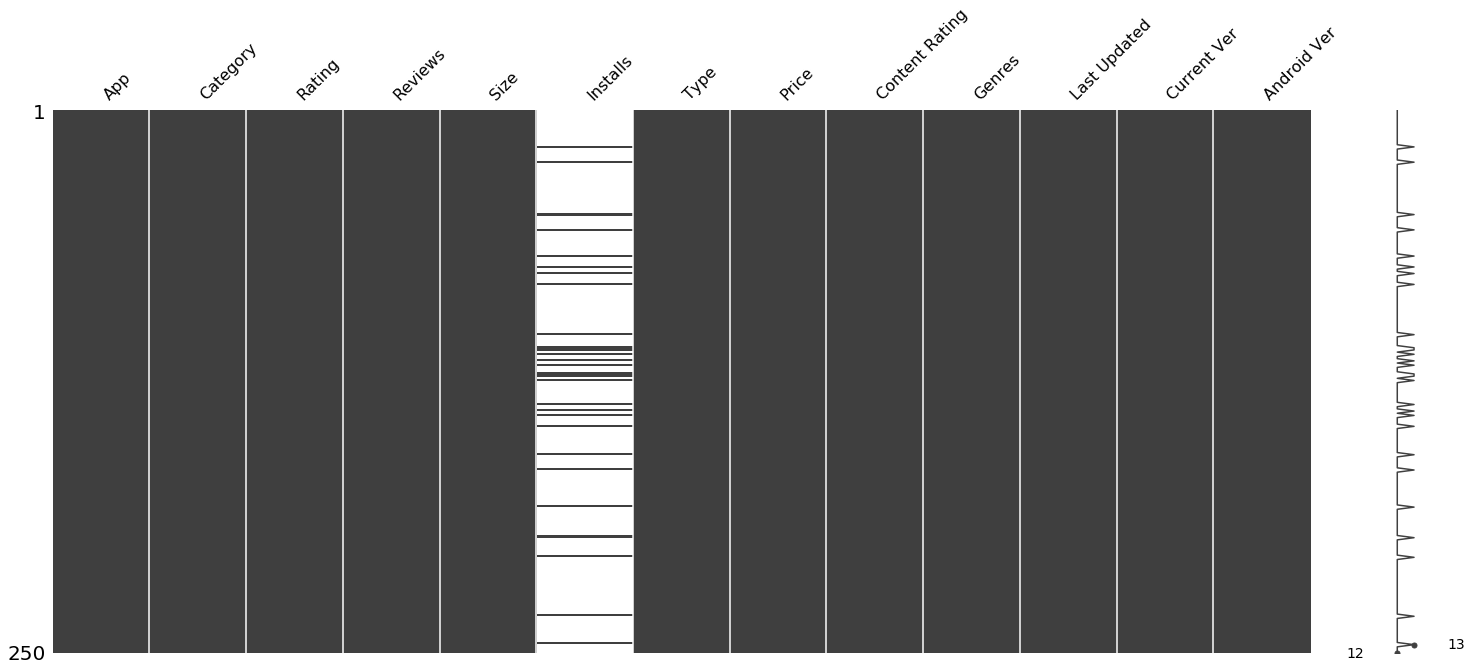

In [12]:
import missingno as msno

msno.matrix(df.sample(250))

In [13]:
## Find how many unique values
df.nunique()

App               7029
Category            33
Rating              39
Reviews           4671
Size               376
Installs             6
Type                 2
Price               68
Content Rating       6
Genres             112
Last Updated      1279
Current Ver       2519
Android Ver         31
dtype: int64

Now it's time to visualise the dataset.

[Text(0, 0, 'FAMILY'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'HOUSE_AND_HOME'),
 Text(0, 0, 'COMICS'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'BEAUTY')]

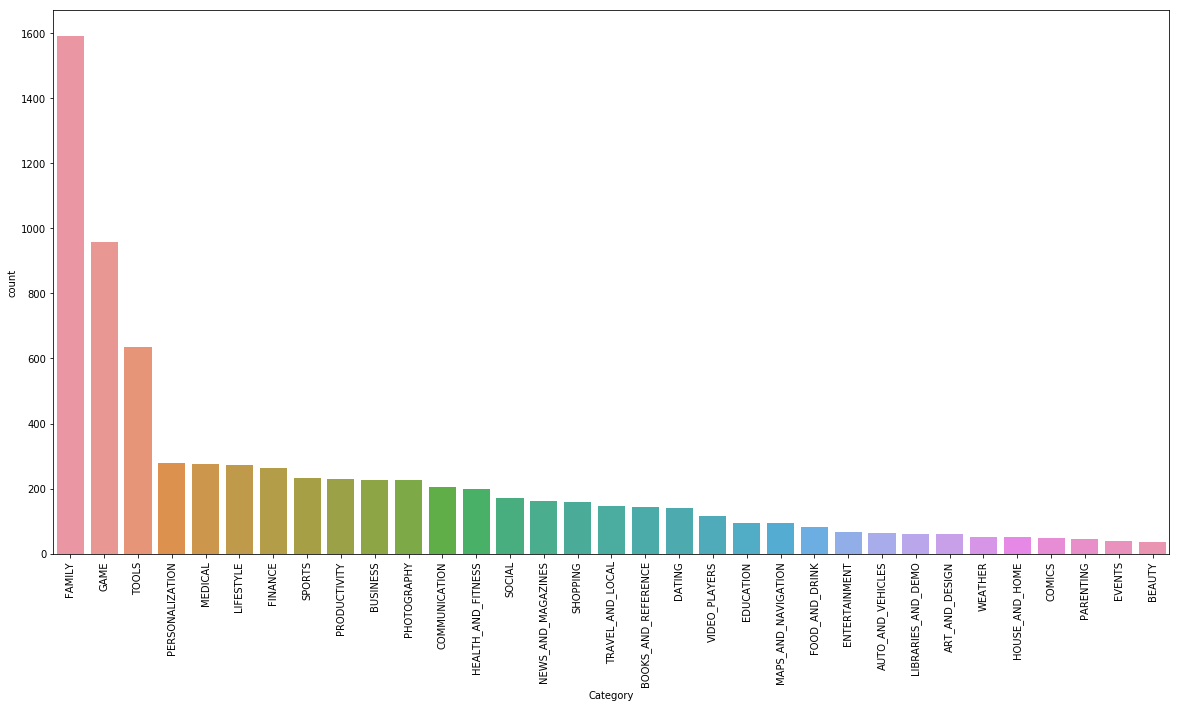

In [14]:
## Most popular app categories

fig, ax = plt.subplots(figsize=(20,10))
a = sns.countplot(df['Category'], orient='v', ax=ax, order = df['Category'].value_counts().index)
a.set_xticklabels(a.get_xticklabels(), rotation=90)

[Text(0, 0, '100.0'),
 Text(0, 0, '500.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '1.0')]

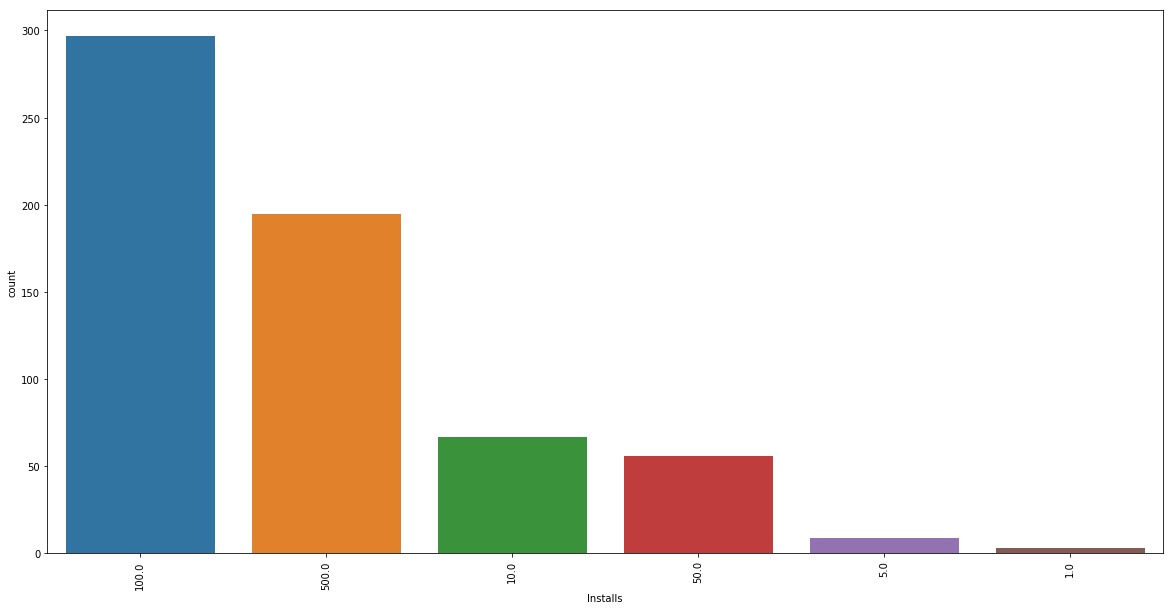

In [15]:
## Most popular app categories

fig, ax = plt.subplots(figsize=(20,10))
a = sns.countplot(df['Installs'], orient='v', ax=ax, order = df['Installs'].value_counts().index)
a.set_xticklabels(a.get_xticklabels(), rotation=90)

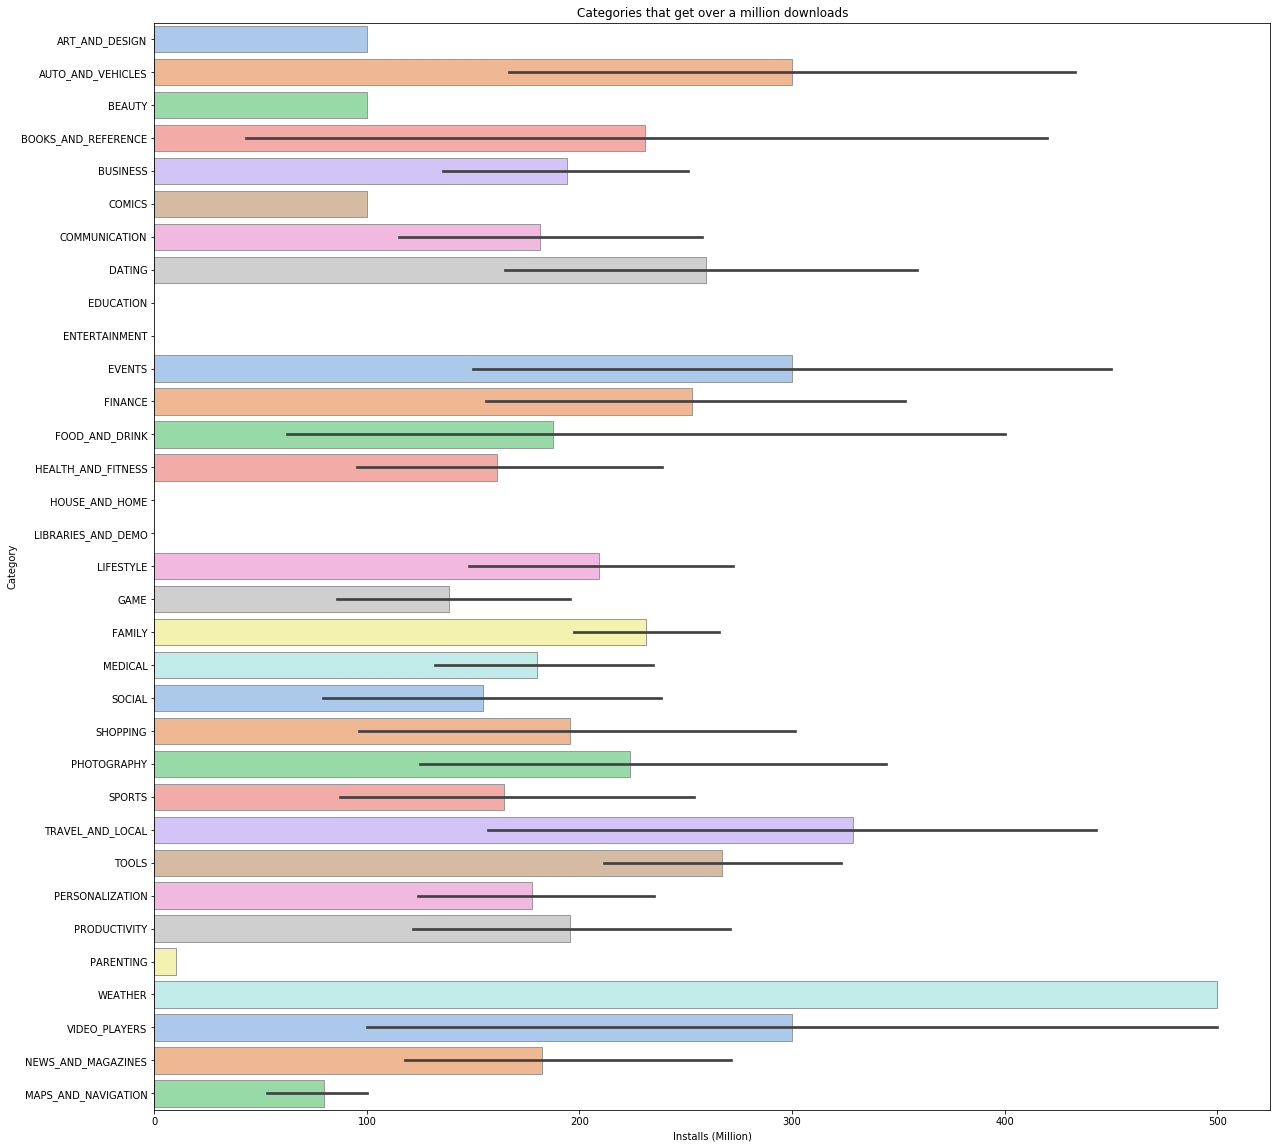

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(y="Category", x='Installs', palette="pastel", edgecolor=".6",
             data=df, ax=ax)
plt.xlabel('Installs (Million)')
plt.title('Categories that get over a million downloads')
plt.show()

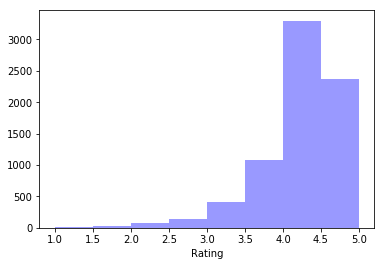

In [17]:
sns.distplot(df['Rating'],color='blue', kde=False, bins=8)

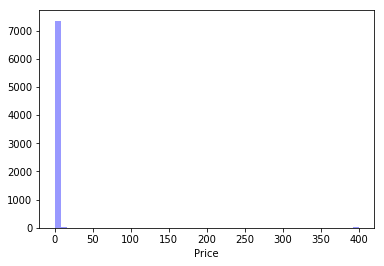

In [18]:
sns.distplot(df['Price'],color='blue', kde=False)
#Outlier alert...

In [19]:
## Function to remove outliers

def remove_outliers(data_frame, column_list, low=0.02, high=0.98):
   for column in column_list:
       this_column = data_frame[column]
       quant_df = this_column.quantile([low,high])
       low_limit = quant_df[low]
       high_limit = quant_df[high]
       data_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
   return data_frame

# Remove outlier
columns_outlier = ['Price']

df = remove_outliers(df, columns_outlier)


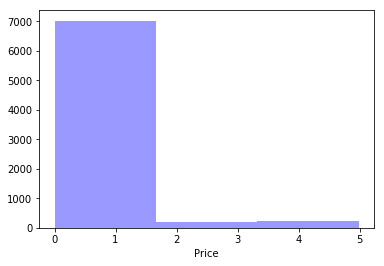

In [20]:
sns.distplot(df['Price'],color='blue', kde=False, bins=3)

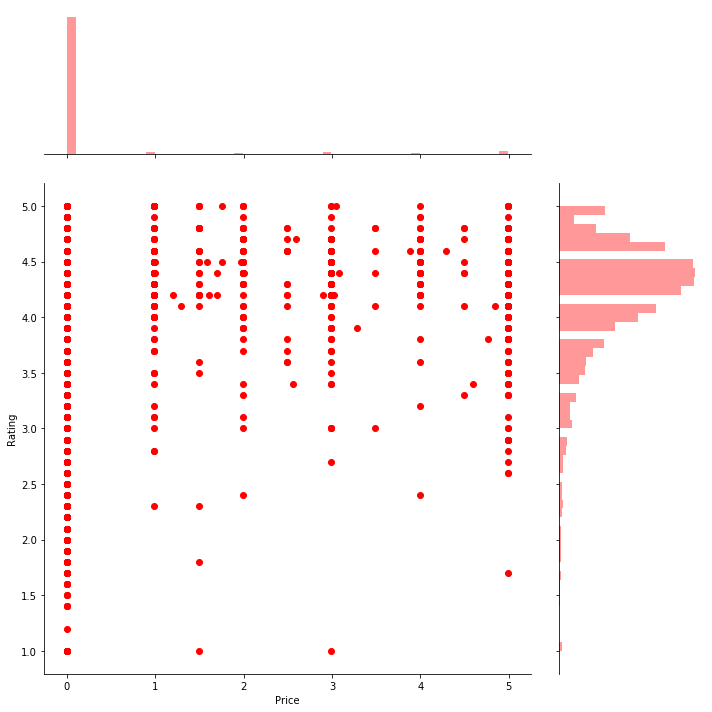

In [21]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="Price", y="Rating", data=df, height=10, ratio=3, color="r")
plt.show()

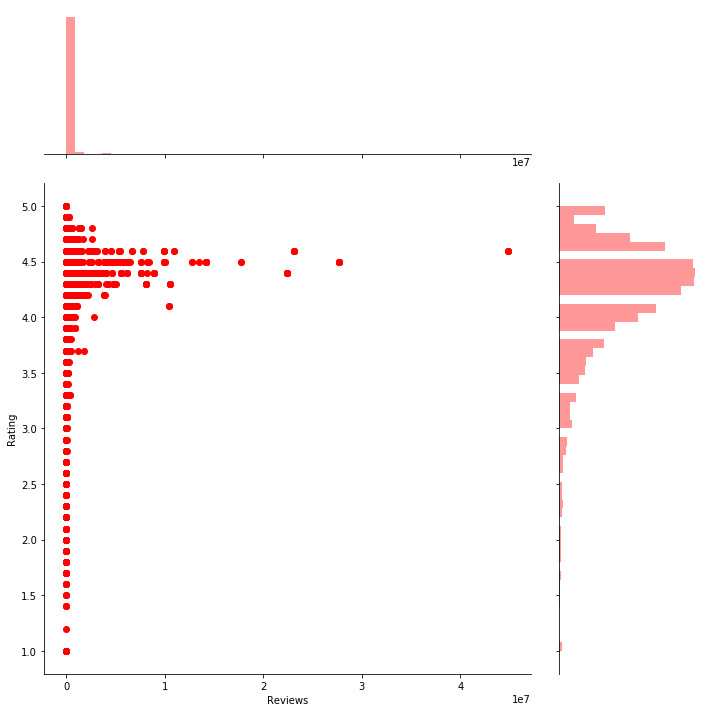

In [22]:
sns.jointplot(x="Reviews", y="Rating", data=df, height=10, ratio=3, color="r")
plt.show()

In [23]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19.0,NaN,0.0
1,3.9,967.0,14.0,NaN,0.0
2,4.7,87510.0,8.7,NaN,0.0
3,4.5,215644.0,25.0,NaN,0.0
4,4.3,967.0,2.8,NaN,0.0


In [24]:
##Drop all nan's in the dataset at once

df_num.dropna(subset=['Installs'], inplace=True)

df_num.head()

,Rating,Reviews,Size,Installs,Price
481,3.5,2.0,17.0,100.0,4.99
605,4.4,28.0,3.4,500.0,0.00
608,4.7,6.0,4.9,100.0,0.00
611,2.7,3.0,3.9,100.0,0.00
615,5.0,2.0,70.0,100.0,0.00


Now that the dataset has removed nulls and outliers, it's time to apply Machine learning techniques to find what predicts a rating score (with regression).

In [25]:
#Split data into training and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_num, test_size=0.2)

y_train = train['Rating']
y_test = test['Rating']

X_train = train.drop(['Rating'], axis=1)
X_test = test.drop(['Rating'], axis=1)

Text(0.5, 1.0, 'Which Feature(s) are most important')

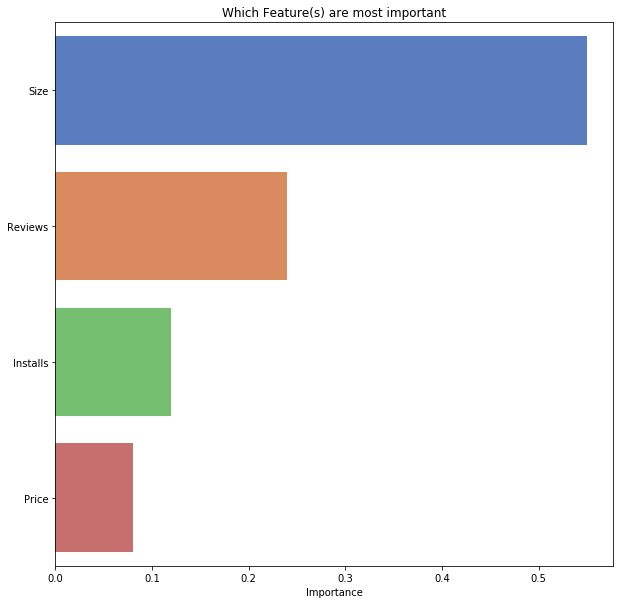

In [26]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

In [27]:
## Pre-process - Standardization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:
X_train

array([[ 0.41094663, -0.28066404,  1.49733515, -0.44341162],
       [-0.32698979,  0.06702366,  1.49733515,  0.69264803],
       [-0.05864927, -0.2235099 , -0.53222199, -0.44341162],
       ...,
       [-0.1257344 , -0.23621082,  1.49733515, -0.44341162],
       [ 0.00843585, -0.21557182, -0.53222199, -0.44341162],
       [-0.39407492, -0.24970555, -0.78591663, -0.44341162]])

In [29]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)



In [30]:
# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

In [31]:
# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

In [32]:
# Support Vector Regressor --------------------------------------------------------------------

train_pred_gaussian, acc_svr = fit_ml_algo(SVR(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

In [33]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR' ],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,94.53
0,RandomForestRegressor,75.40
1,LinearRegression,6.55
3,SVR,-1.04
